# MNIST 손글씨 데이터 인식하기
데이터 불러오기

In [6]:
data_file=open("mnist_test_10.csv")
data_list=data_file.readlines()
data_file.close()

In [7]:
len(data_list)

10

In [8]:
data_list

['7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0

시각화하기

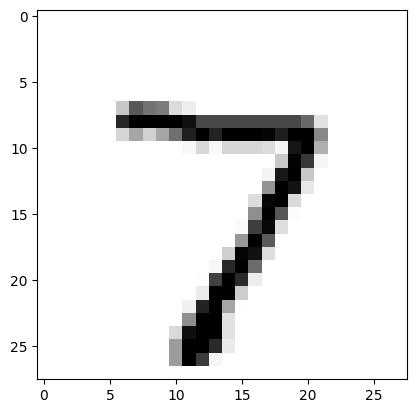

In [9]:
import numpy
import matplotlib.pyplot
%matplotlib inline

all_values=data_list[0].split(',')
image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')

### MNIST 학습 데이터 준비하기
1. 0~255 사이에 속하는 입력 색상 값들의 범위를 0.01 ~ 1.0 사이에 속하게 조정하는 것

In [11]:
scaled_input = (numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [19]:
# 3계층의 신경망으로 MNIST 데이터를 학습하는 코드
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

# 신경망 클래스의 정의
class neuralNetwork:
    # 신경망 초기화하기
    def __init__(self,inputNodes,hiddenNodes,outputNodes,learningRate):
        # 입력, 은닉, 출력 계층의 노드 개수 설정
        self.inodes = inputNodes
        self.hnodes = hiddenNodes
        self.onodes = outputNodes
        
        # 학습률
        self.lr = learningRate
        
        # 가중치 행렬 wih와 who
        # 배열 내 가중치는 w_i_j로 표기. 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
        # w11 w21
        # w21 w22 등
        self.wih=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who=numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        # 활성화 함수로는 시그모이드 함수를 이용
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # 신경망 학습시키기
    def train(self, input_list, target_list):
        #입력 리스트를 2차원의 행렬로 변환
        input=numpy.array(input_list,ndmin=2).T
        target=numpy.array(target_list,ndmin=2).T
        
        #은닉 계층으로 들어오는 신호를 계산
        hidden_inputs=numpy.dot(self.wih, input)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=numpy.dot(self.who,hidden_outputs)
        
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        # 오차는 (실제 값 - 계산 값)
        output_errors=target-final_outputs

        # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
        hidden_errors=numpy.dot(self.who.T, output_errors)
        
        # 은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who += self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)),numpy.transpose(hidden_outputs))
        
        # 입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih += self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(input))
        
        pass

    # 신경망에 질의하기
    def query(self,input_list):
        # 입력 리스트를 2차원 행렬로 변환
        inputs = numpy.array(input_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 계산
        hidden_inputs=numpy.dot(self.wih,inputs)
        # 은닉 계층에서 나가는 신호를 계싼
        hidden_outputs=self.activation_function(hidden_inputs)
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=numpy.dot(self.who,hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs
        

# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# 학습률은 0.3으로 정의
learning_rate = 0.3
# 신경망의 인스턴스를 생성
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

# mnist 학습 데이터인 csv 파일을 리스트로 불러오기
training_data_file=open("mnist_train_100.csv","r")
training_data_list=training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기

# 학습 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    # 입력 값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    # 결과값 생성 (실제 값인 0.99 이외에는 모두 0.01)
    targets=numpy.zeros(output_nodes)+0.01
    # all_values[0]은 이 레코드에 대한 결과값
    targets[int(all_values[0])]=0.99
    n.train(inputs,targets)
    pass

785


array([[0.03304144],
       [0.01041534],
       [0.00924434],
       [0.18642394],
       [0.97702916],
       [0.02776667],
       [0.13657225],
       [0.02252905],
       [0.02045019],
       [0.00102197]])

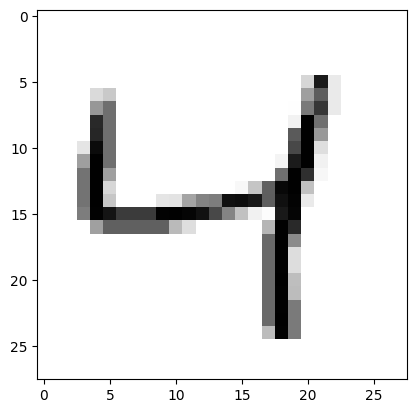

In [32]:
# mnist 테스트 데이터인 csv 파일을 리스트로 불러오기
test_data_file=open("mnist_train_100.csv","r")
test_data_list=test_data_file.readlines()
test_data_file.close()

all_values=test_data_list[2].split(',')
print(len(all_values))

image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')

n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)

In [23]:
# 신경망 테스트
# 신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard=[]

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values=record.split(',')
    # 정답은 첫 번째 값
    correct_label = int(all_values[0])
    print(correct_label,"correct label")
    
    # 입력 값의 범위와 값 조정
    inputs=(numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01
    # 신경망에 질의
    output = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label=numpy.argmax(output)
    print(label,"network's answer")
    # 정답 또는 오답을 리스트에 추가
    if(label==correct_label):
        # 정답인 경우 성적표에 1을 더함
        scorecard.append(1)
    else:
        # 정답이 아닌 경우 성적표에 0을 더함
        scorecard.append(0)
        pass
    pass

7 correct label
7 network's answer
2 correct label
6 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
3 network's answer
5 correct label
4 network's answer
9 correct label
7 network's answer


In [24]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [25]:
scorecard_array=numpy.asarray(scorecard)
print("performance = ",scorecard_array.sum()/scorecard_array.size)

performance =  0.6
